# Classification
In this section, i'll use 2 methods to generate the lable for unit pirce.
    1. Equally spaced, to divide the whole unit price range, 
       which turns out to be really close to gaussian distribution
    2. Euqally area, to divide the whole unit price range.

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import collections
from sklearn import preprocessing
from scipy import stats
import array as arr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import pingouin as pg

In [2]:
data = pd.read_csv("/Users/xiaohan/Desktop/EECS731-Data-Science-master/DS_Project/Beijing_housing_price.csv")
data = data.drop('tradeTime',1)
data = data[0:10000]
data.shape

(10000, 21)

In [3]:
data.head(5)

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1464,106,415.0,31680,131.00,2,1,1,...,1,2005,3,6,0.217,1,0,1,7,56021
1,116.453917,39.881534,903,126,575.0,43436,132.38,2,2,1,...,1,2004,4,6,0.667,1,1,0,7,71539
2,116.561978,39.877145,1271,48,1030.0,52021,198.00,3,2,1,...,4,2005,3,6,0.500,1,0,0,7,48160
3,116.438010,40.076114,965,138,297.5,22202,134.00,3,1,1,...,1,2008,1,6,0.273,1,0,0,6,51238
4,116.428392,39.886229,927,286,392.0,48396,81.00,2,1,1,...,4,1960,2,2,0.333,0,1,1,1,62588


# Pre-processing

In [4]:
data['price'].describe()

count     10000.000000
mean      53208.946800
std       22294.611519
min        9841.000000
25%       36064.250000
50%       48875.000000
75%       67321.250000
max      147797.000000
Name: price, dtype: float64

Based Gaussian distribution, we divide the intervals

In [5]:
data['Price_Level_eq'] = data['price']
def set_price_level_eq(row):
    if row["Price_Level_eq"] < 10000:
        return 0
    elif row["Price_Level_eq"] < 20000:
        return 1
    elif row["Price_Level_eq"] < 30000:
        return 2
    elif row["Price_Level_eq"] < 40000:
        return 3
    elif row["Price_Level_eq"] < 50000:
        return 4
    elif row["Price_Level_eq"] < 60000:
        return 5
    elif row["Price_Level_eq"] < 70000:
        return 6
    elif row["Price_Level_eq"] < 80000:
        return 7
    elif row["Price_Level_eq"] < 90000:
        return 8
    elif row["Price_Level_eq"] < 100000:
        return 9
    elif row["Price_Level_eq"] < 110000:
        return 10
    elif row["Price_Level_eq"] < 120000:
        return 11
    elif row["Price_Level_eq"] < 130000:
        return 12
    elif row["Price_Level_eq"] < 140000:
        return 13
    else:
        return 14
data = data.assign(Price_Level_eq = data.apply(set_price_level_eq,axis = 1))
data.head(5)

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Price_Level_eq
0,116.475489,40.019520,1464,106,415.0,31680,131.00,2,1,1,...,2005,3,6,0.217,1,0,1,7,56021,3
1,116.453917,39.881534,903,126,575.0,43436,132.38,2,2,1,...,2004,4,6,0.667,1,1,0,7,71539,4
2,116.561978,39.877145,1271,48,1030.0,52021,198.00,3,2,1,...,2005,3,6,0.500,1,0,0,7,48160,5
3,116.438010,40.076114,965,138,297.5,22202,134.00,3,1,1,...,2008,1,6,0.273,1,0,0,6,51238,2
4,116.428392,39.886229,927,286,392.0,48396,81.00,2,1,1,...,1960,2,2,0.333,0,1,1,1,62588,4


In [6]:
data['Price_Level_eq'].describe()

count    10000.000000
mean         4.822200
std          2.247775
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: Price_Level_eq, dtype: float64

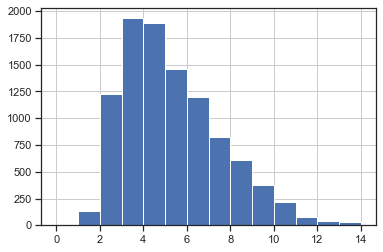

In [7]:
hist = data['Price_Level_eq'].hist(bins=14)

In [8]:
data = data.sort_values('price')
median = data['price'].median()
print(median)

48875.0


Based on this, we could label the unit price based on gaussian distribution. 

(array([1.17718693e-06, 1.18834991e-05, 1.92916582e-05, 1.90176578e-05,
        1.47858738e-05, 1.22589811e-05, 8.77816115e-06, 6.23097219e-06,
        4.06941344e-06, 2.26304039e-06, 8.72742034e-07, 4.97259996e-07,
        2.53704080e-07, 1.01481632e-07]),
 array([  9841.,  19695.,  29549.,  39403.,  49257.,  59111.,  68965.,
         78819.,  88673.,  98527., 108381., 118235., 128089., 137943.,
        147797.]),
 <a list of 14 Patch objects>)

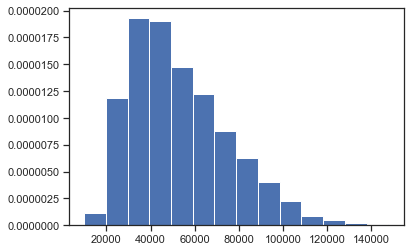

In [9]:
plt.hist(data['price'], density=True, bins=14)

In [10]:
list = []
for i in range(1,15):
    num = data['price'].quantile(i/15)
    list.append(num)
print(list)

[25912.0, 29818.0, 33465.0, 36932.8, 40196.99999999999, 43331.6, 46805.8, 50801.200000000004, 55339.2, 60224.99999999999, 65804.59999999999, 71749.6, 80059.8, 91761.79999999999]


In [11]:
data['Price_Level_area'] = data['price']
def set_price_level_area(row):
    if row["Price_Level_area"] < list[0]:
        return 0
    elif row["Price_Level_area"] < list[1]:
        return 1
    elif row["Price_Level_area"] < list[2]:
        return 2
    elif row["Price_Level_area"] < list[3]:
        return 3
    elif row["Price_Level_area"] < list[4]:
        return 4    
    elif row["Price_Level_area"] < list[5]:
        return 5
    elif row["Price_Level_area"] < list[6]:
        return 6
    elif row["Price_Level_area"] < list[7]:
        return 7
    elif row["Price_Level_area"] < list[8]:
        return 8
    elif row["Price_Level_area"] < list[9]:
        return 9   
    elif row["Price_Level_area"] < list[10]:
        return 10
    elif row["Price_Level_area"] < list[11]:
        return 11
    elif row["Price_Level_area"] < list[12]:
        return 12
    elif row["Price_Level_area"] < list[13]:
        return 13
    else:
        return 14
data = data.assign(Price_Level_area = data.apply(set_price_level_area,axis = 1))
data.head(5)

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Price_Level_eq,Price_Level_area
1730,116.673912,40.209832,163,0,155.0,9841,157.52,3,3,1,...,1,6,0.25,1,0,0,13,35734,0,0
773,116.673912,40.209832,186,39,160.0,10257,156.00,3,3,1,...,1,6,0.25,1,0,0,13,35734,1,0
2025,116.128533,39.723864,108,13,300.0,10522,285.12,3,2,1,...,2,6,0.50,1,1,1,5,30846,1,0
262,116.128533,39.723864,308,10,299.0,10641,281.00,3,2,1,...,3,6,0.50,1,0,1,5,30846,1,0
6838,116.128533,39.723864,51,5,313.0,11137,281.06,3,2,1,...,4,6,0.50,1,1,1,5,30846,1,0


In [12]:
data['Price_Level_area'].describe()

count    10000.00000
mean         7.00020
std          4.32091
min          0.00000
25%          3.00000
50%          7.00000
75%         11.00000
max         14.00000
Name: Price_Level_area, dtype: float64

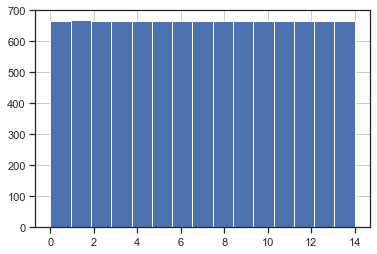

In [13]:
hist = data['Price_Level_area'].hist(bins=15)

In [14]:
#Delete total price, price, unit price
data = data.drop(columns=['totalPrice', 'price','square'])
print(data.shape)

(10000, 20)


# Determine the correlation
    1.pearson
    2.spearman
    3.kendall
    4.percbend
    5.sherpherd
    6.skipped

In [19]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,Lng,Lat,DOM,followers,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Price_Level_eq,Price_Level_area
Lng,1.000000,0.027607,-0.040281,0.015442,0.011670,0.087201,0.008617,0.083224,-0.041043,0.056583,0.080364,0.064486,0.047067,0.060022,0.027107,0.051069,0.139661,-0.064669,-0.059361,-0.032265
Lat,0.027607,1.000000,0.055562,-0.045276,0.081943,0.069961,-0.022541,0.080023,0.115559,0.027790,-0.010027,-0.136205,0.063789,-0.099590,0.020173,-0.107192,0.279116,-0.077014,-0.068996,-0.080699
DOM,-0.040281,0.055562,1.000000,0.346601,0.078628,0.010967,-0.057887,0.096251,-0.025559,0.030222,-0.034717,0.033322,-0.002556,0.035101,-0.131577,0.014996,0.013643,0.022353,0.039900,0.022662
followers,0.015442,-0.045276,0.346601,1.000000,-0.045807,-0.077881,0.004018,-0.094755,0.010231,-0.095370,0.029659,-0.060968,-0.064841,-0.060496,0.056099,0.049305,-0.048014,0.022357,0.048676,0.060327
livingRoom,0.011670,0.081943,0.078628,-0.045807,1.000000,0.516755,0.137856,0.589016,0.142427,-0.013437,-0.020847,-0.070299,0.340118,-0.084474,0.031892,-0.111535,0.030413,-0.034549,-0.072494,-0.075959
drawingRoom,0.087201,0.069961,0.010967,-0.077881,0.516755,1.000000,0.172408,0.560221,0.092574,0.199816,0.058942,0.053132,0.342721,0.042659,0.016678,-0.130812,0.014720,-0.071261,-0.079042,-0.075434
kitchen,0.008617,-0.022541,-0.057887,0.004018,0.137856,0.172408,1.000000,0.144379,0.062184,-0.041372,0.036654,-0.044268,0.097010,-0.046836,0.036626,-0.025782,-0.000320,0.036324,0.027412,0.035917
bathRoom,0.083224,0.080023,0.096251,-0.094755,0.589016,0.560221,0.144379,1.000000,0.047574,0.257612,0.041933,0.131288,0.324303,0.124686,-0.046410,-0.096262,0.001350,-0.041231,-0.079341,-0.074233
buildingType,-0.041043,0.115559,-0.025559,0.010231,0.142427,0.092574,0.062184,0.047574,1.000000,-0.159638,-0.037608,-0.514287,0.341043,-0.611129,0.017102,-0.161700,0.046582,-0.049622,-0.036270,-0.070301
constructionTime,0.056583,0.027790,0.030222,-0.095370,-0.013437,0.199816,-0.041372,0.257612,-0.159638,1.000000,0.070207,0.495306,0.160292,0.497615,-0.220365,-0.161223,-0.083463,-0.276547,-0.280379,-0.288550


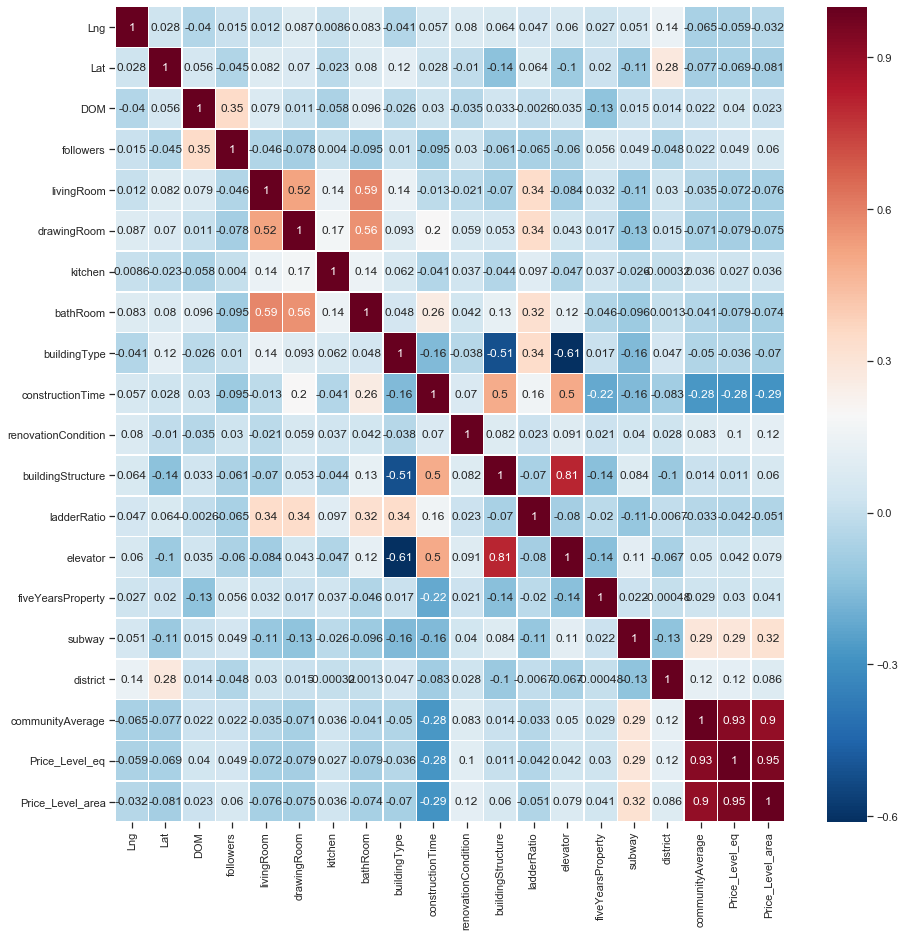

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


In [21]:
kendallcorr = data.corr(method ='kendall') 
kendallcorr

,Lng,Lat,DOM,followers,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Price_Level_eq,Price_Level_area
Lng,1.000000,-0.031469,-0.018090,0.022896,0.004715,0.076111,0.007888,0.075957,-0.056757,0.051237,0.075243,0.083919,0.018479,0.072920,0.017820,0.051260,0.029080,-0.054068,-0.056528,-0.053642
Lat,-0.031469,1.000000,0.037949,-0.024209,0.077695,0.067717,-0.016335,0.079242,0.098456,-0.003426,0.022230,-0.108122,0.079420,-0.077247,0.015054,-0.064717,0.068271,-0.020146,-0.006854,-0.006068
DOM,-0.018090,0.037949,1.000000,0.284818,0.055329,0.011360,-0.027168,0.066174,-0.022320,-0.002888,-0.030218,0.018254,-0.015498,0.022449,-0.127667,0.028733,0.018469,0.049893,0.067347,0.063480
followers,0.022896,-0.024209,0.284818,1.000000,-0.017240,-0.066952,0.018130,-0.091027,0.015671,-0.099052,0.017009,-0.062701,-0.054285,-0.064238,0.074327,0.048757,-0.001805,0.067441,0.083300,0.081398
livingRoom,0.004715,0.077695,0.055329,-0.017240,1.000000,0.470972,0.129707,0.505757,0.148593,-0.041857,-0.026130,-0.079886,0.319243,-0.089643,0.042760,-0.103970,-0.007727,-0.041955,-0.054923,-0.054471
drawingRoom,0.076111,0.067717,0.011360,-0.066952,0.470972,1.000000,0.157645,0.566578,0.073570,0.155016,0.084074,0.067319,0.334037,0.058215,0.012051,-0.125378,-0.024222,-0.063296,-0.067183,-0.065321
kitchen,0.007888,-0.016335,-0.027168,0.018130,0.129707,0.157645,1.000000,0.128013,0.058810,-0.040459,0.028113,-0.043419,0.092498,-0.046938,0.036749,-0.025774,0.004649,0.033025,0.029577,0.030277
bathRoom,0.075957,0.079242,0.066174,-0.091027,0.505757,0.566578,0.128013,1.000000,0.037357,0.211883,0.083341,0.131175,0.276896,0.130506,-0.037941,-0.095759,-0.040759,-0.050062,-0.076991,-0.074951
buildingType,-0.056757,0.098456,-0.022320,0.015671,0.148593,0.073570,0.058810,0.037357,1.000000,-0.145191,-0.068066,-0.544940,0.375119,-0.648572,0.029997,-0.159297,0.002263,-0.081452,-0.064571,-0.065876
constructionTime,0.051237,-0.003426,-0.002888,-0.099052,-0.041857,0.155016,-0.040459,0.211883,-0.145191,1.000000,0.140547,0.435360,0.091281,0.431497,-0.213447,-0.128983,-0.113188,-0.174125,-0.188871,-0.186162


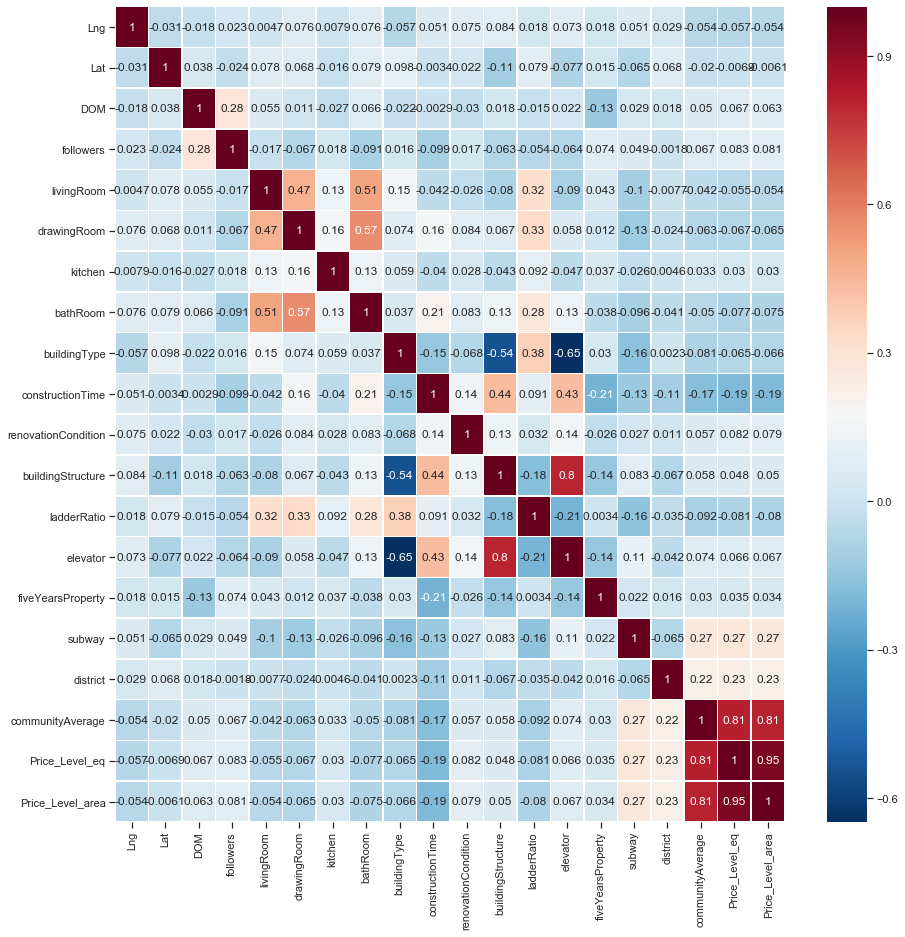

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(kendallcorr, 
            xticklabels=kendallcorr.columns,
            yticklabels=kendallcorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [23]:
spearmancorr = data.corr(method ='spearman') 
spearmancorr

,Lng,Lat,DOM,followers,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Price_Level_eq,Price_Level_area
Lng,1.000000,-0.031068,-0.027299,0.033485,0.006396,0.096149,0.009670,0.094122,-0.073678,0.073897,0.094803,0.104324,0.025471,0.089267,0.021814,0.062752,0.025963,-0.053543,-0.054124,-0.050114
Lat,-0.031068,1.000000,0.056316,-0.035601,0.100945,0.084508,-0.020030,0.098495,0.126046,-0.011437,0.027119,-0.134657,0.110447,-0.094565,0.018429,-0.079225,0.173535,-0.037611,-0.017692,-0.019137
DOM,-0.027299,0.056316,1.000000,0.409372,0.071612,0.014340,-0.033277,0.081671,-0.028633,-0.003795,-0.038138,0.022741,-0.021490,0.027423,-0.155952,0.035099,0.025618,0.073464,0.092579,0.089807
followers,0.033485,-0.035601,0.409372,1.000000,-0.022364,-0.083812,0.022113,-0.112213,0.020026,-0.144630,0.021613,-0.077933,-0.075401,-0.078231,0.090518,0.059378,-0.002389,0.101421,0.117039,0.117948
livingRoom,0.006396,0.100945,0.071612,-0.022364,1.000000,0.505899,0.138489,0.539440,0.166788,-0.056907,-0.028739,-0.087398,0.382593,-0.095744,0.045670,-0.111047,-0.009618,-0.054701,-0.067377,-0.068832
drawingRoom,0.096149,0.084508,0.014340,-0.083812,0.505899,1.000000,0.162452,0.587695,0.080313,0.184594,0.089890,0.070980,0.387390,0.060003,0.012421,-0.129229,-0.028253,-0.079923,-0.079527,-0.079641
kitchen,0.009670,-0.020030,-0.033277,0.022113,0.138489,0.162452,1.000000,0.129506,0.061883,-0.048730,0.029238,-0.044310,0.105656,-0.047000,0.036798,-0.025809,0.005303,0.040454,0.034062,0.035934
bathRoom,0.094122,0.098495,0.081671,-0.112213,0.539440,0.587695,0.129506,1.000000,0.039649,0.256798,0.087433,0.135307,0.318444,0.132011,-0.038378,-0.096863,-0.047409,-0.061932,-0.089577,-0.089902
buildingType,-0.073678,0.126046,-0.028633,0.020026,0.166788,0.080313,0.061883,0.039649,1.000000,-0.190177,-0.074432,-0.583646,0.461395,-0.681318,0.031511,-0.167340,0.003375,-0.105511,-0.078763,-0.082908
constructionTime,0.073897,-0.011437,-0.003795,-0.144630,-0.056907,0.184594,-0.048730,0.256798,-0.190177,1.000000,0.171914,0.537253,0.126201,0.519156,-0.256809,-0.155186,-0.153946,-0.255840,-0.260668,-0.264797


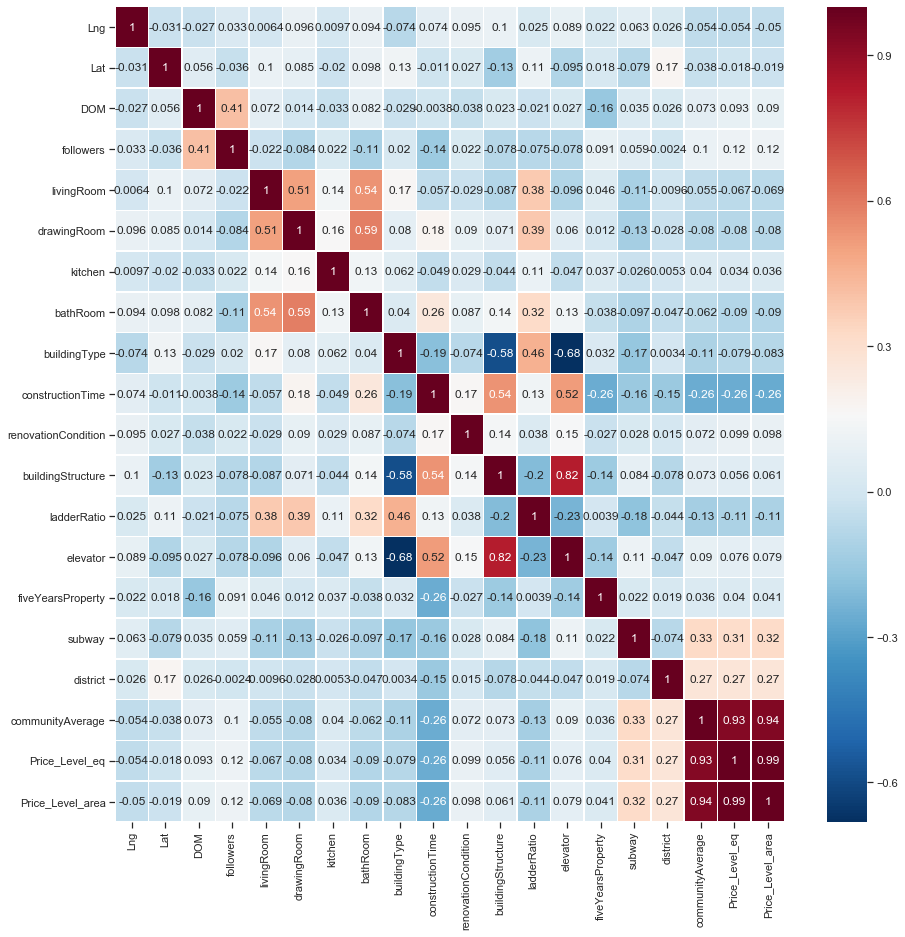

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# From features above, 6 features are selected:
    1.community average
    2.DOM
    3.followers
    4.Construction Time 
    5.subway
    6.district
    

# Classification

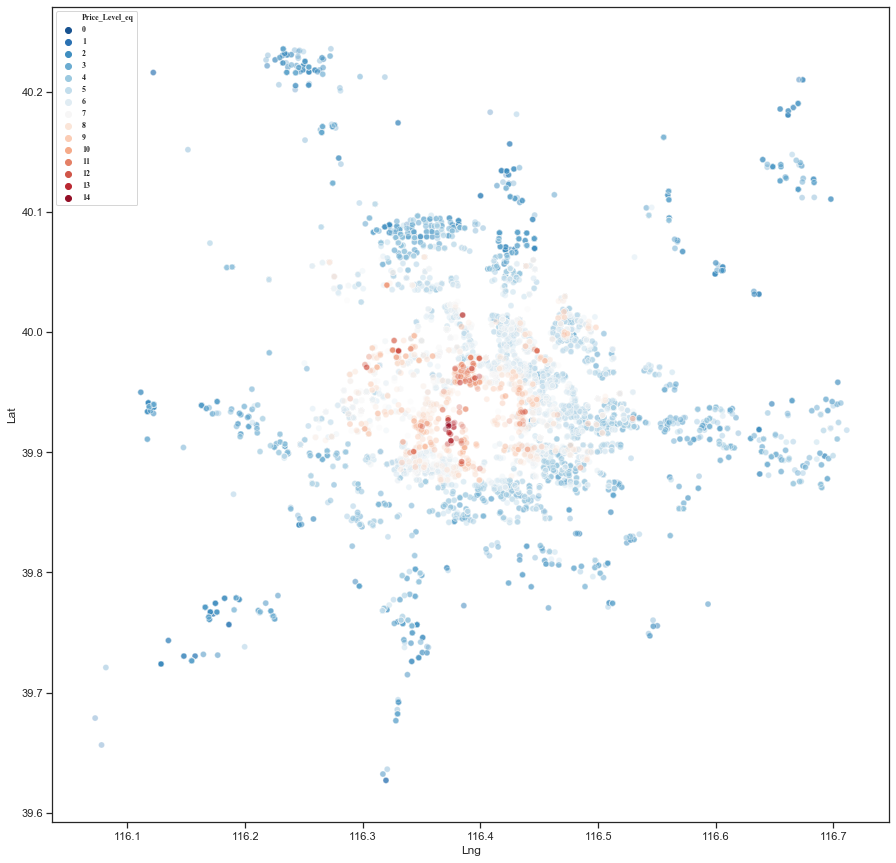

In [25]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Lng", y="Lat", hue="Price_Level_eq", palette=sns.color_palette("RdBu_r",n_colors=15), data=data, legend="brief", alpha=0.3)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

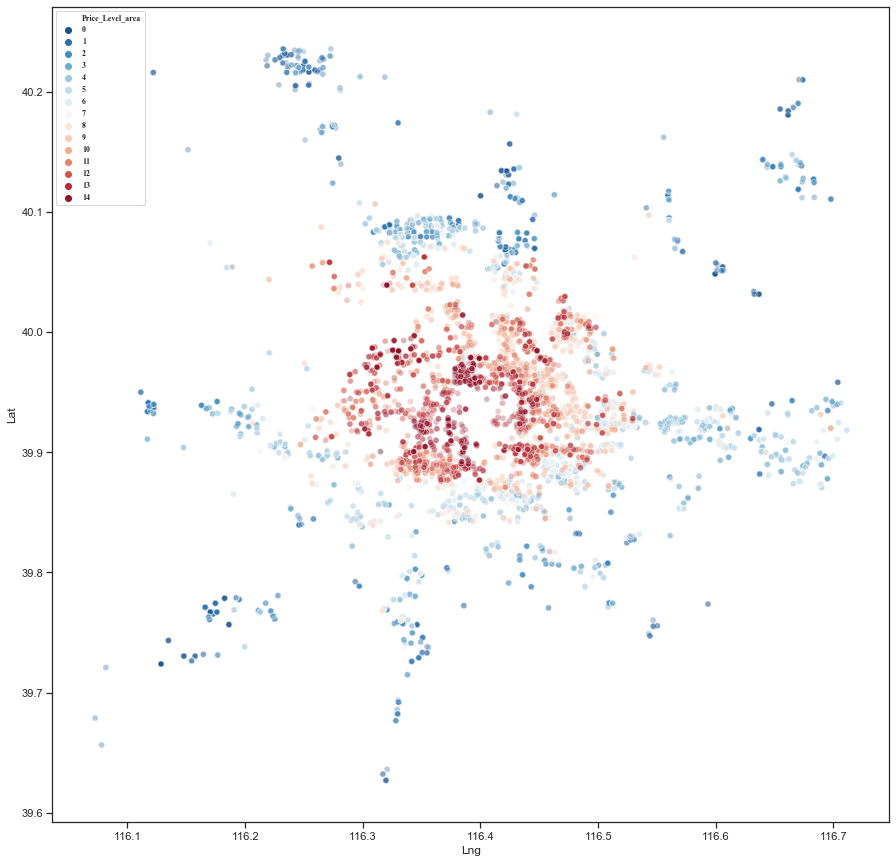

In [26]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Lng", y="Lat", hue="Price_Level_area", palette=sns.color_palette("RdBu_r", n_colors=15), data=data, legend="brief", alpha=0.3)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

feature = []
for i in range(0,18):
    feature.append(data.columns[i])
print(feature)

In [27]:
#Community Average, subway, DOM, construction time, renovation condition, followers, drawing room
#feature
feature = ["communityAverage","DOM","constructionTime", "subway","followers","district"]
data_X = data[feature]
data_Y = data["Price_Level_eq"]

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data_X, data_Y, test_size=0.8, random_state=61)
dataplot = X_test.copy()


# Visualize the train_set and test_set

In [59]:
sum_0=0;
sum_1=0;
sum_2=0;
sum_3=0;
sum_4=0;
sum_5=0;
sum_6=0;
sum_7=0;
sum_8=0;
sum_9=0;
sum_10=0;
sum_11=0;
sum_12=0;
sum_13=0;
sum_14=0;
for i in range(0,Y_test.index.shape[0]):
    if Y_test[Y_test.index[i]] == 0:
        sum_0 = sum_0 + 1
    elif Y_test[Y_test.index[i]] == 1:
        sum_1 = sum_1 + 1
    elif Y_test[Y_test.index[i]] == 2:
        sum_2 = sum_2 + 1
    elif Y_test[Y_test.index[i]] == 3:
        sum_3 = sum_3 + 1
    elif Y_test[Y_test.index[i]] == 4:
        sum_4 = sum_4 + 1
    elif Y_test[Y_test.index[i]] == 5:
        sum_5 = sum_5 + 1
    elif Y_test[Y_test.index[i]] == 6:
        sum_6 = sum_6 + 1
    elif Y_test[Y_test.index[i]] == 7:
        sum_7 = sum_7 + 1
    elif Y_test[Y_test.index[i]] == 8:
        sum_8 = sum_8 + 1
    elif Y_test[Y_test.index[i]] == 9:
        sum_9 = sum_9 + 1
    elif Y_test[Y_test.index[i]] == 10:
        sum_10 = sum_10 + 1
    elif Y_test[Y_test.index[i]] == 11:
        sum_11 = sum_11 + 1
    elif Y_test[Y_test.index[i]] == 12:
        sum_12 = sum_12 + 1
    elif Y_test[Y_test.index[i]] == 13:
        sum_13 = sum_13 + 1
    else:
        sum_14 = sum_14 +1
print("label 0 count:" + str(sum_0))
print("label 1 count:" + str(sum_1))
print("label 2 count:" + str(sum_2))
print("label 3 count:" + str(sum_3))
print("label 4 count:" + str(sum_4))
print("label 5 count:" + str(sum_5))
print("label 6 count:" + str(sum_6))
print("label 7 count:" + str(sum_7))
print("label 8 count:" + str(sum_8))
print("label 9 count:" + str(sum_9))
print("label 10 count:" + str(sum_10))
print("label 11 count:" + str(sum_11))
print("label 12 count:" + str(sum_12))
print("label 13 count:" + str(sum_13))
print("label 14 count:" + str(sum_14))

label 0 count:1
label 1 count:109
label 2 count:973
label 3 count:1547
label 4 count:1491
label 5 count:1191
label 6 count:954
label 7 count:669
label 8 count:481
label 9 count:296
label 10 count:173
label 11 count:64
label 12 count:26
label 13 count:17
label 14 count:8


From the image above, it's pretty obvious that using same area doesn't really help, compaing with the real time data on Lianjia's website, so start here, we'll use the equally spaced divided data to do the classification.

In [146]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

['communityAverage', 'DOM', 'constructionTime', 'subway', 'followers', 'district']
[0.41116158 0.17720805 0.13613226 0.02301716 0.16870414 0.0837768 ]
train score: 1.0
test score: 0.536375


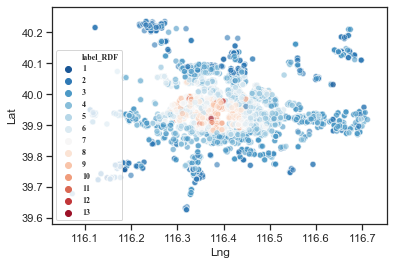

In [150]:
dataplot["label_RDF"] = predict
dataplot["Lng"] = data["Lng"]
dataplot["Lat"] = data["Lat"]
sns.scatterplot(x="Lng", y="Lat", hue="label_RDF", palette=sns.color_palette("RdBu_r", n_colors=13), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=5)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

['communityAverage', 'DOM', 'constructionTime', 'subway', 'followers', 'district']
[0.57866561 0.17930424 0.11128101 0.00789507 0.09705699 0.02579708]
train score: 0.9995
test score: 0.49425


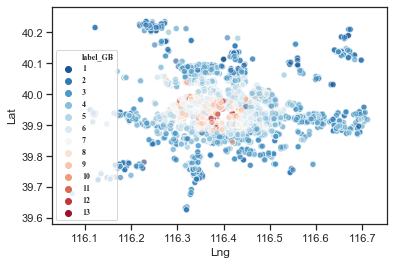

In [67]:
dataplot["label_GB"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="label_GB", palette=sns.color_palette("RdBu_r", n_colors=13), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

['communityAverage', 'DOM', 'constructionTime', 'subway', 'followers', 'district']
[0.46338811 0.18003267 0.11169542 0.03032599 0.17353633 0.04102147]
train score: 1.0
test score: 0.43675


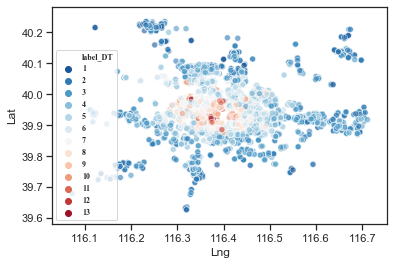

In [71]:
dataplot["label_DT"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="label_DT", palette=sns.color_palette("RdBu_r", n_colors=13), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 0.5795
test score: 0.515


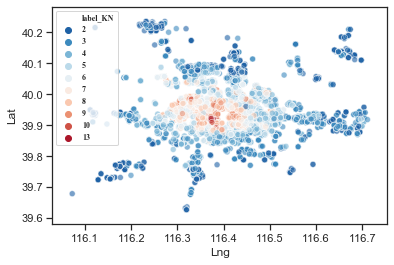

In [79]:
dataplot["label_KN"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="label_KN", palette=sns.color_palette("RdBu_r", n_colors=10), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [80]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 1.0
test score: 0.187875


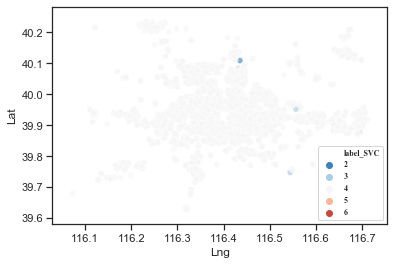

In [91]:
dataplot["label_SVC"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="label_SVC", palette=sns.color_palette("RdBu_r", n_colors=5), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [153]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(solver='sgd', alpha=1e-5,activation='relu', hidden_layer_sizes=(10),learning_rate='adaptive', learning_rate_init=0.001,random_state=27, early_stopping=False,max_iter=500,verbose=False)
clf.fit(X_test, Y_test)
predict = clf.predict(X_test)
#print('train score: ' + str(clf.score(X_train, Y_train)))
#print('test score: ' + str(clf.score(X_test, Y_test)))
accuracy_score(Y_test, predict)

0.193375

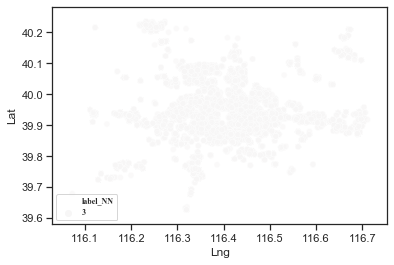

In [169]:
dataplot["label_NN"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="label_NN", palette=sns.color_palette("RdBu_r", n_colors=1), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

dataplot["label_GNB"] = predict
sns.scatterplot(x="Lng", y="Lat", hue="label_GNB", palette=sns.color_palette("RdBu_r", n_colors=15), data=dataplot, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [111]:
dataplot["Ground_Truth"] = Y_test
dataplot.head(5)

,communityAverage,DOM,constructionTime,subway,followers,district,label_RDF,Lng,Lat,label_GB,label_DT,label_KN,label_SVC,label_NN,Ground_Truth
6697,60338,108,2000,1,40,7,4,116.421401,40.034126,4,4,4,4,-0.214201,-0.368306
5729,67509,62,2001,0,26,8,5,116.369475,40.069842,5,4,5,4,0.003002,0.077248
5402,60785,90,2008,0,12,7,4,116.425370,40.052808,5,4,4,4,-0.409280,-0.368306
5839,37289,65,2008,1,5,6,2,116.322852,40.088619,2,2,2,4,-1.074531,-1.259414
2346,58225,161,1988,0,42,7,4,116.461647,39.999380,4,5,4,4,-0.378057,-0.368306


In [43]:
result = pd.DataFrame(dataplot)
result = result.iloc[:,7:13]
result.head()

,label_GB,label_DT,label_KN,label_SVC,label_GNB,Ground_Truth
1291,5,5,5,5,4,4
6064,6,6,6,6,3,12
9713,4,4,3,5,5,4
5995,3,3,3,3,3,4
8767,5,5,5,5,6,5
